In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pickle

# load data

In [2]:
# efficiency
df_efficiency=pd.read_csv('preprocessing/efficiency/efficiency_index.csv', index_col=0)
df_efficiency.columns=df_efficiency.columns.astype(int)

f = open('preprocessing/efficiency/efficiency.pickle', 'rb')
dict_eff_model_params, dict_eff_model_cov, dict_eff_error = pickle.load(f)
f.close()

# HDD
f1=open('preprocessing/HDD/HDD_misc.pickle', 'rb')
countries, df_gas_threshold, df_theta, df_HDD_error = pickle.load(f1)
f1.close()

f2=open('preprocessing/HDD/HDD_values.pickle', 'rb')
dict_dfs_daily_HDD, df_annual_HDD_baseline = pickle.load(f2)
f2.close()

f3=open('preprocessing/HDD/clustering.pickle', 'rb')
df_cluster_summary, df_cluster_cardinality, df_representative_year, df_representative_year_HDD, dict_window_start=pickle.load(f3)
f3.close()


In [3]:
# remove NO from gas model
countries=[country for country in countries if country!='NO']
print(countries)
print(len(countries))

['AT', 'BE', 'BG', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FR', 'GB', 'GR', 'HR', 'HU', 'IE', 'IT', 'LT', 'LV', 'NL', 'PL', 'RO', 'SI', 'SK', 'FI', 'SE', 'LU', 'PT', 'CH', 'UA']
28


In [4]:
# population 
df_pop1=pd.read_csv('raw_data/Eurostat/population_1990to2021.csv', index_col=0)
df_pop2=pd.read_csv('raw_data/Eurostat/population_2011to2022.csv', index_col=0)
df_pop=pd.concat([df_pop1.loc[countries], df_pop2.loc[countries, '2022']], axis=1)
# shift pop by on year (eurostat takes jan 1 --> shift to dec 31 the prev year)
df_pop=df_pop.rename(dict(zip(df_pop.columns, [int(year)-1 for year in df_pop.columns])), axis=1)
df_pop=df_pop.astype(float)
df_pop

,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
TIME,,,,,,,,,,,,,,,,,,,,,
AT,7644818.0,7710882.0,7798899.0,7882519.0,7928746.0,7943489.0,7953067.0,7964966.0,7971116.0,7982461.0,...,8451860.0,8507786.0,8584926.0,8700471.0,8772865.0,8822267.0,8858775.0,8901064.0,8932664.0,8978929.0
BE,9947782.0,9986975.0,10021997.0,10068319.0,10100631.0,10130574.0,10143047.0,10170226.0,10192264.0,10213752.0,...,11137974.0,11180840.0,11237274.0,11311117.0,11351727.0,11398589.0,11455519.0,11522440.0,11554767.0,11631136.0
BG,8767308.0,8669269.0,8595465.0,8484863.0,8459763.0,8427418.0,8384715.0,8340936.0,8283200.0,8230371.0,...,7284552.0,7245677.0,7202198.0,7153784.0,7101859.0,7050034.0,7000039.0,6951482.0,6916548.0,6838937.0
CZ,10362102.0,10304607.0,10312548.0,10325697.0,10334013.0,10333161.0,10321344.0,10309137.0,10299125.0,10289621.0,...,10516125.0,10512419.0,10538275.0,10553843.0,10578820.0,10610055.0,10649800.0,10693939.0,10701777.0,10516707.0
DE,62679035.0,79753227.0,80274564.0,80974632.0,81338093.0,81538603.0,81817499.0,82012162.0,82057379.0,82037011.0,...,80523746.0,80767463.0,81197537.0,82175684.0,82521653.0,82792351.0,83019213.0,83166711.0,83155031.0,83237124.0
DK,5135409.0,5146469.0,5162126.0,5180614.0,5196642.0,5215718.0,5251027.0,5275121.0,5294860.0,5313577.0,...,5602628.0,5627235.0,5659715.0,5707251.0,5748769.0,5781190.0,5806081.0,5822763.0,5840045.0,5873420.0
EE,1570599.0,1567749.0,1554878.0,1511303.0,1476952.0,1448075.0,1425192.0,1405996.0,1393074.0,1379237.0,...,1320174.0,1315819.0,1314870.0,1315944.0,1315635.0,1319133.0,1324820.0,1328976.0,1330068.0,1331796.0
ES,38853227.0,38881416.0,39051336.0,39264034.0,39458489.0,39639726.0,39808374.0,39971329.0,40143449.0,40303568.0,...,46727890.0,46512199.0,46449565.0,46440099.0,46528024.0,46658447.0,46937060.0,47332614.0,47398695.0,47432805.0
FR,NaN,58313439.0,58604851.0,58885929.0,59104320.0,59315139.0,59522297.0,59726386.0,59934884.0,60158533.0,...,65600350.0,66165980.0,66458153.0,66638391.0,66809816.0,67026224.0,67177636.0,67320216.0,67656682.0,67842582.0


In [5]:
# JRCIDEES households gas data
df_gas=pd.read_excel('raw_data/JRCIDEES/SpaceHeating_JRCIDEES.xlsx', sheet_name='gas_cons_COM_space_heat',
                     index_col=0) #[ktoe]
# 1 ktoe = 41.78 TJ
df_gas=df_gas*41.78 # TJ
df_gas.columns=df_gas.columns.astype(int)
df_gas

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
ktoe,,,,,,,,,,,,,,,,
GB,285803.178580,288639.006297,245461.858966,258821.973930,277591.863793,268908.810761,234793.323520,216063.567933,325423.575703,255143.467719,281422.561913,265704.142273,270901.484869,283658.519024,222806.005754,228369.878332
SK,54479.679309,25847.982614,16006.968367,17022.250343,11272.726011,34648.270806,38539.141493,35079.725960,34403.544522,20570.023943,31788.805258,11877.134514,23125.283780,27649.289861,15830.315533,17301.834761
SI,735.553653,3003.848627,3424.772787,1654.267130,2094.705105,863.401897,482.206243,418.870943,469.436085,635.204499,873.539402,1519.640972,421.815597,1132.308252,1202.598759,1707.766519
SE,1019.543853,955.909008,2218.435493,3158.192510,3166.041878,3356.899919,3379.858216,3458.548649,3613.146498,1734.166091,3897.947505,3452.794030,4611.257385,3953.863885,3553.622320,3502.933819
RO,7696.515795,19107.967775,1923.123814,14840.490667,20118.442388,24359.921670,54921.927681,36215.712058,25098.602702,28759.368872,29182.778609,22229.405536,22846.849290,23441.199512,22723.175928,20674.939673
PT,1702.921555,2175.049455,3050.443668,3329.330511,4151.013582,3882.604646,4608.288525,5088.400739,5540.057987,6338.588430,5991.217166,6762.315498,6717.349228,6680.286951,6476.714914,6813.150056
PL,34059.728634,44401.146284,53976.105471,58435.150774,61060.492686,59258.140717,53602.077964,54741.258600,60135.378182,64096.163072,71223.798971,64907.453637,66828.488214,61947.578367,52779.334829,56978.521614
NL,100956.675405,110781.632863,102264.602938,109895.206095,125526.287084,110580.702100,111044.852527,95844.974322,107044.807515,111666.806758,133407.204590,100550.685042,117090.017033,117633.429794,87253.208602,92262.471000
LV,1450.730421,1408.708352,2208.591909,2480.032047,3089.128520,3166.084596,3490.001620,3956.930509,3886.903302,3685.061240,3891.445805,3442.880464,3317.816980,2774.271193,3061.402349,2849.363449


In [6]:
df_annual_HDD=df_annual_HDD_baseline.T # transpose to match format
df_annual_HDD

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
AT,2892.839050,2636.265930,2600.758398,2497.438358,2665.205201,2836.824154,2697.693629,2823.476021,2520.766415,2302.651268,...,2810.479457,2351.542156,2505.560326,2574.337334,2050.550596,2249.986161,2365.823085,2458.611535,2247.114158,2232.978313
BE,2011.317810,1954.515665,1919.077897,1882.309344,1867.531958,2275.504807,2082.149760,2108.818373,1691.428434,1702.694601,...,2171.075853,1595.132536,1813.175728,1986.408327,1471.272407,1639.104488,1846.438799,1701.631622,1694.736867,1587.367160
BG,2794.381499,2664.683099,2740.134050,2680.472968,2737.139305,2840.277256,2728.151321,2859.465635,2755.593266,2407.719616,...,2433.587292,2696.939310,2645.925425,2330.386811,2202.369498,2433.903058,2384.230572,2523.026840,2340.930942,2126.906415
CZ,2986.066674,2755.249091,2653.087120,2509.478682,2667.991524,2983.545118,2727.154859,2968.311869,2540.233329,2321.240960,...,2969.688204,2440.867942,2591.628734,2622.694945,2032.062055,2228.079510,2406.554243,2486.430468,2256.151215,2183.827405
DE,2344.847410,2232.323489,2112.776851,2065.105083,2148.172232,2446.864992,2226.258365,2409.254167,1930.667530,1843.356326,...,2455.591898,1855.488391,2012.031465,2134.967474,1597.201119,1764.523367,1968.723739,1893.296000,1797.313670,1751.967503
DK,2568.368114,2560.784260,2376.582923,2217.411350,2276.164069,2734.647472,2523.369553,2592.377028,2236.076344,1971.233570,...,2762.429719,2155.206271,2291.549522,2325.337876,1838.684936,1900.490955,2194.662880,2041.719483,2159.302116,1889.872730
EE,2588.531070,2440.934547,2300.387182,2214.491634,2359.774730,2900.025208,2549.022737,2851.202464,2445.900424,1835.569968,...,2823.810237,2177.781529,2486.968392,2302.930623,2087.954592,1770.125968,2221.592812,2055.048757,2226.841801,1907.153855
ES,1318.202086,1138.212553,1208.439243,1159.488418,1326.750793,1316.673720,1265.443599,1194.708309,1207.305040,1034.001586,...,1354.645378,1162.750263,1266.142081,1282.872299,1129.669301,1119.896278,1117.165409,1165.526885,1194.617045,1097.626298
FR,2213.352464,2065.016430,1977.583874,2087.799894,2130.301903,2331.080961,2195.846735,2215.828164,1849.762181,1805.636247,...,2326.224965,1656.557956,1969.295931,2127.129432,1621.293340,1789.811118,1904.613761,1860.970033,1777.175077,1775.995142
GB,1740.840433,1791.465968,1651.493969,1653.034719,1673.927795,1872.366303,1855.195754,1802.546034,1567.770786,1498.567015,...,1924.155309,1336.677836,1589.338415,1740.852614,1313.235242,1379.534810,1585.086367,1437.541458,1544.606951,1460.488531


In [7]:
df_eff_idx = pd.read_csv('preprocessing/efficiency/efficiency_index.csv', index_col=0)
df_eff_idx.columns=df_eff_idx.columns.astype(int)
df_eff_idx

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
AT,1.308544,1.247721,1.198730,1.159269,1.127484,1.101882,1.081260,1.064649,1.051270,1.040493,...,1.014652,1.010998,1.008055,1.005684,1.003775,1.002237,1.000998,1.0,0.999196,0.998549
BG,1.057444,1.052854,1.048507,1.044391,1.040494,1.036803,1.033308,1.029998,1.026863,1.023895,...,1.013516,1.011255,1.009115,1.007088,1.005169,1.003351,1.001630,1.0,0.998457,0.996995
HR,1.379935,1.366512,1.352619,1.338237,1.323352,1.307944,1.291995,1.275486,1.258399,1.240712,...,1.163535,1.142519,1.120766,1.098249,1.074943,1.050818,1.025847,1.0,0.973246,0.945553
CY,2.119621,1.926215,1.765383,1.631639,1.520420,1.427933,1.351023,1.287067,1.233882,1.189654,...,1.075709,1.058122,1.043496,1.031334,1.021220,1.012810,1.005816,1.0,0.995164,0.991142
CZ,1.329137,1.293687,1.261502,1.232283,1.205754,1.181670,1.159804,1.139952,1.121929,1.105566,...,1.053862,1.043769,1.034606,1.026287,1.018734,1.011877,1.005652,1.0,0.994869,0.990210
DK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.199860,1.135769,1.092090,...,1.018786,1.012365,1.007988,1.005006,1.002973,1.001588,1.000643,1.0,0.999561,0.999263
EE,1.221450,1.207881,1.194611,1.181633,1.168941,1.156528,1.144389,1.132517,1.120907,1.109552,...,1.066579,1.056420,1.046486,1.036770,1.027268,1.017976,1.008888,1.0,0.991308,0.982807
FI,1.247889,1.246562,1.244970,1.243060,1.240767,1.238015,1.234713,1.230751,1.225995,1.220288,...,1.183519,1.169314,1.152266,1.131808,1.107256,1.077792,1.042433,1.0,0.949077,0.887965
FR,1.539391,1.492545,1.448670,1.407578,1.369093,1.333049,1.299292,1.267675,1.238064,1.210332,...,1.115912,1.095927,1.077211,1.059682,1.043264,1.027888,1.013487,1.0,0.987368,0.975538
DE,1.636672,1.562982,1.496838,1.437468,1.384177,1.336343,1.293408,1.254869,1.220277,1.189228,...,1.093733,1.075642,1.059403,1.044828,1.031745,1.020002,1.009461,1.0,0.991508,0.983885


In [8]:
# gas use in TJ per capita, adjusted to 2020 efficiency

# select overlapping years
years=list(set.intersection(set(df_eff_idx.columns), set(df_pop.columns), set(df_gas.columns)))
years.sort()

# select overlapping countries
countries=[country for country in countries if country in df_gas.index]

# base year is 2020
df_gas_capita_20=pd.DataFrame(index=countries, columns=years, data=
    np.divide(np.divide(df_gas.loc[countries, years].values, 
                        df_pop.loc[countries, years].values), 
              df_eff_idx.loc[countries, years].values))
df_gas_capita_20

,2000,2001,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
AT,0.001938,0.002941,0.003164,0.003939,0.003480,0.003774,0.003031,0.003366,0.002910,0.002971,0.002336,0.002324,0.001887,0.001848,0.001512
BE,0.003474,0.003812,0.003953,0.004187,0.004242,0.004128,0.003233,0.004356,0.004508,0.005224,0.004107,0.004529,0.005366,0.004005,0.004643
BG,0.000034,0.000055,0.000087,0.000087,0.000138,0.000219,0.000221,0.000279,0.000202,0.000283,0.000298,0.000285,0.000266,0.000295,0.000345
CZ,0.002992,0.003640,0.003636,0.003639,0.003932,0.003816,0.003782,0.004270,0.003818,0.003703,0.003564,0.003274,0.003102,0.002987,0.002989
DE,0.002148,0.002320,0.002253,0.002339,0.002363,0.003278,0.002593,0.002882,0.002770,0.003286,0.002951,0.003160,0.003987,0.003576,0.003815
DK,NaN,NaN,NaN,NaN,NaN,NaN,0.001244,0.001288,0.001334,0.001348,0.001022,0.001186,0.001276,0.000854,0.000990
EE,0.000214,0.000425,0.001478,0.001354,0.001062,0.001166,0.001051,0.000781,0.000613,0.000687,0.000718,0.000819,0.001088,0.001747,0.001857
ES,0.000226,0.000305,0.000088,0.000150,0.000393,0.001336,0.000732,0.000621,0.000821,0.001140,0.001298,0.001000,0.000885,0.000665,0.001377
FR,0.001462,0.001544,0.001929,0.002058,0.003733,0.003502,0.003788,0.003609,0.003245,0.004025,0.002863,0.003785,0.003710,0.002700,0.002700
GB,NaN,NaN,0.002688,0.002999,0.003012,0.002719,0.002579,0.003995,0.003214,0.003628,0.003500,0.003642,0.003883,0.003096,0.003216


[1.95635806]


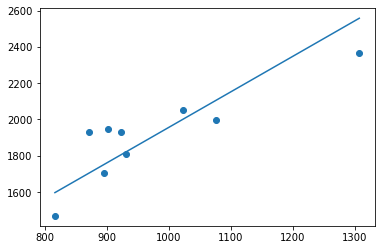

[1.79898233 1.944851   2.00455881 1.81019804 1.89995719 2.2137709
 1.85470985 2.09259939 2.1603493 ]


In [9]:
# try linear model with y-intercept=0

def func_linear(x,k):
    return x*k

from scipy.optimize import curve_fit

country='IE'
model_years=[year for year in df_annual_HDD.columns if year in  df_gas_capita_20.loc[country].dropna().index]
v_gas=df_gas_capita_20.loc[country, model_years]*1000000 # TJ to MJ 
v_HDD=df_annual_HDD.loc[country, model_years]

# linear model
popt, pcov = curve_fit(func_linear, v_HDD , v_gas, bounds=(0, np.inf))
print(popt)

plt.plot(np.sort(v_HDD), func_linear(np.sort(v_HDD), *popt))

plt.scatter(v_HDD, v_gas)
plt.show()
print(v_gas.values/v_HDD.values)

In [10]:
# compute gas use in MJ per capita per HDD, adjusted to 2020 efficiency

import statsmodels.api as sm

dict_constants={}
dict_L_error={}
dict_nsamples={}
for country in countries:
    model_years=[year for year in df_annual_HDD.columns if year in  df_gas_capita_20.loc[country].dropna().index]
    v_gas=df_gas_capita_20.loc[country,  model_years]*1000000 # TJ to MJ 
    v_HDD=df_annual_HDD.loc[country, model_years]
    
    dict_nsamples[country]=len(model_years)
    
    # scipy linear model
    # popt, pcov = curve_fit(func_linear, v_HDD , v_gas, bounds=(0, np.inf))
    # dict_constants[country]=popt[0]
    # dict_error[country]=pcov[0][0]
    
    # statsmodel 
    model = sm.OLS(endog=v_gas.values, exog=v_HDD.values).fit()
    dict_constants[country]=model.params[0]
    dict_L_error[country]=model.bse[0] # standard error of coefficient L

s_constants=pd.Series(data=dict_constants)
s_constants

AT    1.123357
BE    2.399292
BG    0.081276
CZ    1.408149
DE    1.472100
DK    0.541209
EE    0.438452
ES    0.594073
FR    1.545830
GB    2.134295
GR    0.305076
HR    0.283998
HU    1.760893
IE    1.956358
IT    2.857371
LT    0.209056
LV    0.431917
NL    3.039719
PL    0.447779
RO    0.509090
SI    0.154936
SK    1.639617
FI    0.057365
SE    0.086245
LU    2.921589
PT    0.639676
dtype: float64

In [11]:
# check 
dict_L_error

{'AT': 0.06604373464489831,
 'BE': 0.060451771022091184,
 'BG': 0.011044439323226522,
 'CZ': 0.04198674703169283,
 'DE': 0.08764051023622836,
 'DK': 0.022770865388564304,
 'EE': 0.057856356924301,
 'ES': 0.09415128422607152,
 'FR': 0.11050127204239522,
 'GB': 0.07434123020064079,
 'GR': 0.016730980813836397,
 'HR': 0.01801330851728635,
 'HU': 0.11576192031009451,
 'IE': 0.04949891282350582,
 'IT': 0.139424558617782,
 'LT': 0.014680983100328579,
 'LV': 0.0381116335674001,
 'NL': 0.08270131133705119,
 'PL': 0.020244021142001113,
 'RO': 0.06062701876113127,
 'SI': 0.03130103204224301,
 'SK': 0.16673415744951448,
 'FI': 0.0027805621877570537,
 'SE': 0.00802876330250742,
 'LU': 0.12824481312401476,
 'PT': 0.06500746154572755}

In [12]:
dict_nsamples

{'AT': 15,
 'BE': 15,
 'BG': 15,
 'CZ': 15,
 'DE': 15,
 'DK': 9,
 'EE': 15,
 'ES': 15,
 'FR': 15,
 'GB': 13,
 'GR': 6,
 'HR': 15,
 'HU': 6,
 'IE': 9,
 'IT': 8,
 'LT': 8,
 'LV': 15,
 'NL': 15,
 'PL': 15,
 'RO': 15,
 'SI': 9,
 'SK': 15,
 'FI': 15,
 'SE': 15,
 'LU': 8,
 'PT': 13}

In [13]:
df_L_summary=pd.DataFrame(index=countries, columns=['n_points', 'L', 'std_err'], data=
                         np.concatenate([np.array([int(v) for v in dict_nsamples.values()]).reshape(-1,1) ,
                            np.array([float(v) for v in dict_constants.values()]).reshape(-1,1),
                            np.array([float(v) for v in dict_L_error.values()]).reshape(-1,1)
                           ], axis=1))
df_L_summary

,n_points,L,std_err
AT,15.0,1.123357,0.066044
BE,15.0,2.399292,0.060452
BG,15.0,0.081276,0.011044
CZ,15.0,1.408149,0.041987
DE,15.0,1.472100,0.087641
DK,9.0,0.541209,0.022771
EE,15.0,0.438452,0.057856
ES,15.0,0.594073,0.094151
FR,15.0,1.545830,0.110501
GB,13.0,2.134295,0.074341


In [14]:
# projected population at on jan 1, 2023
pop_22=df_pop[2021]*2-df_pop[2020]
pop_22

TIME
AT     9025194.0
BE    11707505.0
BG     6761326.0
CZ    10331637.0
DE    83319217.0
DK     5906795.0
EE     1333524.0
ES    47466915.0
FR    68028482.0
GB    67736833.0
GR    10528988.0
HR     3721793.0
HU     9647248.0
IE     5113686.0
IT    58730031.0
LT     2816316.0
LV     1858291.0
NL    17705929.0
PL    37468493.0
RO    18874534.0
SI     2105383.0
SK     5409643.0
FI     5562689.0
SE    10525357.0
LU      656064.0
PT    10405832.0
CH     8802720.0
UA    40576679.0
dtype: float64

# convert to cubic meter

In [15]:
#dict_dfs_annual_HDD=dict()
dict_dfs_annual_gas=dict()
dict_dfs_annual_gas_std=dict()

for scenario in df_representative_year.columns:
    #dict_dfs_annual_HDD[scenario]=pd.DataFrame(index=countries, columns=np.arange(-5, 5.5, 0.5))
    dict_dfs_annual_gas[scenario]=pd.DataFrame(index=countries, columns=np.arange(-5, 5.5, 0.5))
    dict_dfs_annual_gas_std[scenario]=pd.DataFrame(index=countries, columns=np.arange(-5, 5.5, 0.5))

for country in countries:    
#for country in ['GB']:

    # country params
    rep_years=df_representative_year.loc[country].unique()

    df_daily_HDD=dict_dfs_daily_HDD[country]

    _pop=pop_22.loc[country]
    _L=s_constants[country]
    _eff=df_eff_idx.loc[country, 2022]

    # uncertainty params
    dHDD=df_HDD_error.loc[country, 'annual_deviation']
    dL=dict_L_error[country]
    deta=dict_eff_error[country]


    with pd.ExcelWriter('output/JRC/JRC_COM_daily_gas/%s_daily_gas_demand.xlsx' %country) as writer: 
        for year in rep_years:

            # scenario(s) in which the year is the representative
            rep_scearios= (df_representative_year.columns)[df_representative_year.loc[country]==year].to_list()

            # daily HDD
            _df_daily_HDD=df_daily_HDD.loc[df_daily_HDD.index.year==year]
            # daily gas
            df_daily_gas=_df_daily_HDD*_L*_pop*_eff/37/1000000 # MJ to million cubic meter, 1 cm = 37 MJ

            # sum to annual HDD
            v_annual_HDD=_df_daily_HDD.sum().values
            # sum to annual gas demand 
            v_annual_gas=df_daily_gas.sum().values
            
            # uncertainty
            v_annual_gas_std=np.array([np.sqrt((_pop*hdd*dL*_eff)**2 + (_pop*_L* dHDD*_eff)**2 +
                          (_pop*_L* hdd * deta)**2)   for hdd in v_annual_HDD])/37/1000000

            for scenario in rep_scearios:
                # save to annual dicts
                #dict_dfs_annual_HDD[scenario].loc[country]=v_annual_HDD
                dict_dfs_annual_gas[scenario].loc[country]=v_annual_gas
                dict_dfs_annual_gas_std[scenario].loc[country]=v_annual_gas_std

                # save to excel
                df_daily_gas.to_excel(writer, sheet_name=scenario)

        # close excel file
        writer.save()
    
    print(country)

        
        
    


AT
BE
BG
CZ
DE
DK
EE
ES
FR
GB
GR
HR
HU
IE
IT
LT
LV
NL
PL
RO
SI
SK
FI
SE
LU
PT


In [16]:
dict_dfs_annual_gas['normal']

,-5.0,-4.5,-4.0,-3.5,-3.0,-2.5,-2.0,-1.5,-1.0,-0.5,...,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
AT,410.850996,438.290899,466.29329,494.772223,523.806244,553.481652,583.831768,614.936483,646.610546,678.84413,...,744.798978,778.390693,812.373332,846.70259,881.35181,916.29098,951.450468,986.855685,1022.46846,1058.270705
BE,640.213829,706.413231,775.0547,845.500524,917.497668,990.83586,1065.28707,1140.629788,1216.740272,1293.461765,...,1448.198113,1526.041464,1604.141805,1682.440805,1760.935069,1839.558491,1918.194668,1996.830846,2075.467023,2154.1032
BG,21.811109,23.136453,24.479399,25.839108,27.215581,28.608147,30.0139,31.434078,32.868819,34.320436,...,37.271497,38.767697,40.277765,41.797242,43.323302,44.856916,46.396487,47.942465,49.49347,51.047894
CZ,594.292842,632.303892,671.284339,711.453218,752.825581,795.200911,838.543429,882.902817,928.179838,974.258866,...,1068.83567,1117.176743,1166.106434,1215.576832,1265.559575,1316.007469,1366.955347,1418.341491,1470.055691,1522.038741
DE,3078.335584,3369.735236,3670.48381,3978.690623,4294.299095,4617.685948,4949.876868,5288.795466,5633.074913,5982.890356,...,6699.294089,7066.131356,7437.620363,7813.637705,8193.517469,8576.662921,8961.976308,9349.6165,9739.123531,10130.390446
DK,104.849946,113.231007,121.708597,130.293681,138.980252,147.761031,156.615983,165.527019,174.495468,183.515592,...,201.672005,210.783129,219.909583,229.052555,238.202341,247.354025,256.505709,265.657393,274.809077,283.960761
EE,22.358887,23.800238,25.265037,26.756869,28.271427,29.80753,31.367485,32.947735,34.543698,36.150643,...,39.387891,41.01496,42.643656,44.274023,45.905884,47.539972,49.175108,50.811576,52.450068,54.08941
ES,378.998688,420.009547,462.824365,507.185817,552.967567,600.124168,648.366213,697.434989,747.054261,797.137697,...,898.711002,950.264458,1002.26461,1054.623346,1107.326931,1160.224666,1213.32905,1266.56648,1319.874642,1373.195896
FR,2513.107598,2770.987962,3039.09195,3316.141163,3602.261014,3897.470075,4200.762472,4511.365466,4829.178754,5153.434029,...,5818.309577,6157.892172,6501.911541,6849.732677,7200.853046,7554.766109,7911.725648,8271.835675,8634.627826,9000.201173
GB,2384.368463,2698.255453,3029.622796,3378.005891,3741.553655,4115.406527,4495.448162,4881.026712,5271.299093,5665.183535,...,6461.613146,6863.156689,7266.132535,7670.314563,8074.89292,8480.161859,8885.954999,9291.970021,9698.183786,10104.397892


In [17]:
dict_dfs_annual_gas_std['normal']

,-5.0,-4.5,-4.0,-3.5,-3.0,-2.5,-2.0,-1.5,-1.0,-0.5,...,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
AT,25.773915,27.480588,29.223104,30.996012,32.804119,34.652733,36.543879,38.482493,40.456992,42.466726,...,46.579874,48.675155,50.795047,52.936766,55.098632,57.278755,59.472775,61.682265,63.904831,66.139334
BE,21.274463,23.380749,25.572472,27.82807,30.138422,32.495966,34.892712,37.320993,39.776385,42.253476,...,47.25421,49.77187,52.298895,54.833259,57.374739,59.921097,62.468481,65.016405,67.564808,70.113638
BG,3.117161,3.30634,3.498045,3.692153,3.888663,4.08748,4.288186,4.490958,4.695816,4.903088,...,5.324474,5.538125,5.753759,5.97074,6.188663,6.407668,6.627526,6.8483,7.069795,7.29178
CZ,25.753478,27.398592,29.08578,30.824511,32.615429,34.449847,36.326208,38.246656,40.20689,42.201899,...,46.296776,48.38985,50.508445,52.650482,54.814731,56.999147,59.205234,61.430319,63.669628,65.920596
DE,229.215849,250.687897,272.866624,295.6099,318.911354,342.797104,367.34163,392.390455,417.841608,443.707243,...,496.691707,523.827997,551.311389,579.132427,607.241561,635.594389,664.109454,692.798319,721.626775,750.58676
DK,5.144469,5.554974,5.970255,6.390841,6.816432,7.246667,7.680559,8.117219,8.55671,8.998748,...,9.888555,10.335086,10.782378,11.230487,11.678936,12.127485,12.576039,13.024598,13.473161,13.921728
EE,3.105814,3.305751,3.508955,3.715924,3.926056,4.139189,4.35564,4.574915,4.796378,5.01937,...,5.468613,5.694413,5.920442,6.146707,6.373182,6.599969,6.826904,7.054026,7.281431,7.508956
ES,79.720613,85.92315,92.563067,99.584745,106.952857,114.646502,122.606154,130.77765,139.104576,147.56341,...,164.850828,173.679307,182.614182,191.636771,200.741667,209.900187,219.112187,228.362914,237.639798,246.931278
FR,189.842611,208.080801,227.142665,246.923373,267.420479,288.626358,310.46138,332.863634,355.820697,379.272757,...,427.433468,452.061155,477.026942,502.282846,527.790733,553.512386,579.465043,605.655264,632.048118,658.650062
GB,113.767333,128.697916,144.46484,161.045198,178.350275,196.148232,214.242654,232.602149,251.186304,269.943402,...,307.87221,326.995992,346.188434,365.438702,384.708169,404.010805,423.338649,442.677271,462.025541,481.373989


In [18]:
df_daily_gas

,10.0,10.5,11.0,11.5,12.0,12.5,13.0,13.5,14.0,14.5,...,15.5,16.0,16.5,17.0,17.5,18.0,18.5,19.0,19.5,20.0
2009-01-01,0.000000,0.000000,0.002919,0.031466,0.075513,0.136714,0.202888,0.274533,0.358303,0.445999,...,0.621391,0.709088,0.796784,0.884480,0.972176,1.059872,1.147569,1.235265,1.322961,1.410657
2009-01-02,0.000000,0.000000,0.000000,0.016237,0.073649,0.144842,0.230893,0.318589,0.406285,0.493981,...,0.669374,0.757070,0.844766,0.932462,1.020159,1.107855,1.195551,1.283247,1.370944,1.458640
2009-01-03,0.000000,0.011779,0.043821,0.096564,0.164337,0.244573,0.332269,0.419965,0.507662,0.595358,...,0.770750,0.858446,0.946143,1.033839,1.121535,1.209231,1.296927,1.384624,1.472320,1.560016
2009-01-04,0.057399,0.108291,0.170409,0.235046,0.303828,0.376908,0.454726,0.541543,0.629239,0.716936,...,0.892328,0.980024,1.067720,1.155417,1.243113,1.330809,1.418505,1.506202,1.593898,1.681594
2009-01-05,0.256608,0.326034,0.401000,0.487803,0.575499,0.663196,0.750892,0.838588,0.926284,1.013980,...,1.189373,1.277069,1.364765,1.452462,1.540158,1.627854,1.715550,1.803246,1.890943,1.978639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-27,0.252663,0.301054,0.363451,0.439372,0.521682,0.607930,0.695626,0.783322,0.871018,0.958714,...,1.134107,1.221803,1.309499,1.397196,1.484892,1.572588,1.660284,1.747980,1.835677,1.923373
2009-12-28,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002182,0.007558,0.016475,0.034223,...,0.162969,0.250666,0.338362,0.426058,0.513754,0.601450,0.689147,0.776843,0.864539,0.952235
2009-12-29,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010661,0.035234,0.081187,...,0.252400,0.340096,0.427792,0.515488,0.603185,0.690881,0.778577,0.866273,0.953970,1.041666
2009-12-30,0.000000,0.000000,0.000000,0.000000,0.016627,0.052660,0.112171,0.192904,0.280601,0.368297,...,0.543689,0.631385,0.719082,0.806778,0.894474,0.982170,1.069866,1.157563,1.245259,1.332955


In [19]:
# save to excel

# save gas model output in bcm
dicts_to_save=[dict_dfs_annual_gas, dict_dfs_annual_gas_std]

for i in range(2):
    if i==0:
        suffix='COM_gas_space_heating_bcm'
    else:
        suffix='COM_gas_space_heating_std_bcm'
        
    _dfs=dicts_to_save[i]
        
    with pd.ExcelWriter('output/JRC/annual_%s.xlsx' %suffix) as writer:     
        for scenario, _df in _dfs.items():
            _df=_df/1000 # mcm to bcm
            _df.to_excel(writer, sheet_name=scenario)
        writer.save()


In [20]:
(dict_dfs_annual_gas['normal'][-1.0].sum()-dict_dfs_annual_gas['normal'][0.0].sum())/1000 # mcm to bcm

-4.056692445259949